In [1]:
import geopandas as gpd
import pandas as pd

In [7]:
buildings = gpd.read_file('data/buildings.geojson')

In [8]:
data = buildings
data.head(3)

,id,city,year,geometry
0,3600851,г. Архангельск,1972,POINT (4500192.491 9488394.583)
1,3600852,г. Архангельск,1971,POINT (4500308.835 9488520.679)
2,3600853,г. Архангельск,1974,POINT (4500297.482 9488325.283)


In [9]:
print (data.crs.name)
data = data.to_crs('WGS84')
print(data.crs.name)
buildings = data
data.head(3)

WGS 84 / Pseudo-Mercator
WGS 84


,id,city,year,geometry
0,3600851,г. Архангельск,1972,POINT (40.42592 64.54061)
1,3600852,г. Архангельск,1971,POINT (40.42696 64.54110)
2,3600853,г. Архангельск,1974,POINT (40.42686 64.54035)


<AxesSubplot:>

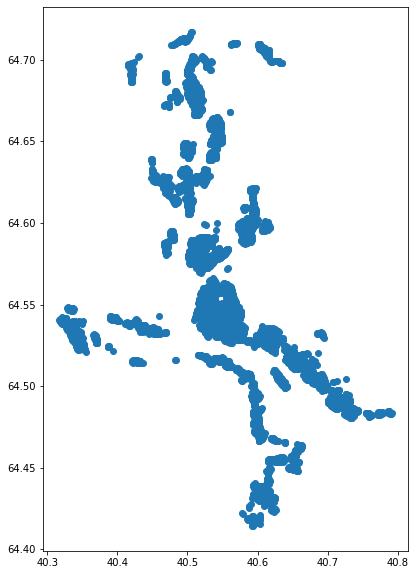

In [5]:
data.plot(figsize=(10,10))

In [6]:
data[data.id == 3600851]

,id,city,year,geometry
0,3600851,г. Архангельск,1972,POINT (40.42592 64.54061)


In [14]:
all_res = []

def convert(objectid):
    obj = data[data.id == objectid]
    for _, row in obj.iterrows():
        geo = row.geometry

        obj = {}
        obj['id'] = objectid
        obj['city'] = row.city
        obj['year'] = row.year
        obj['geometry'] = [geo.y, geo.x]

        all_res.append(obj)

data = buildings
objectids = data.id
#objectids = [ 3600851 ]
for objectid in objectids:
    convert(objectid)

buildings_df = pd.DataFrame(all_res)
data = buildings_df
data

,id,city,year,geometry
0,3600851,г. Архангельск,1972,"[64.54061438983302, 40.425916959655396]"
1,3600852,г. Архангельск,1971,"[64.5411013195515, 40.426962100081106]"
2,3600853,г. Архангельск,1974,"[64.54034678012545, 40.426860110753644]"
3,3600854,г. Архангельск,1983,"[64.5402153397441, 40.42570553037348]"
4,3600855,г. Архангельск,1984,"[64.53989847983806, 40.4268225099708]"
...,...,...,...,...
9599,3698034,г. Архангельск,0,"[64.41810803107242, 40.60122290617863]"
9600,3698035,г. Архангельск,0,"[64.41877306702328, 40.60369002130863]"
9601,3698036,г. Архангельск,0,"[64.4165623751895, 40.600623953564636]"
9602,3698037,г. Архангельск,0,"[64.41585417711335, 40.602848635857335]"


In [15]:
data.to_csv('data/buildings_lense.csv', index=False)